In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from statsmodels.api import qqplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/long_dataset_beach_dataset.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
print(df.shape)

(1025, 14)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [ ]:
print(df.describe().T)

           count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323

In [ ]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
print(df['sex'].value_counts())

sex
1    713
0    312
Name: count, dtype: int64


In [ ]:
print(df['cp'].value_counts())

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64


In [ ]:
print(df['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


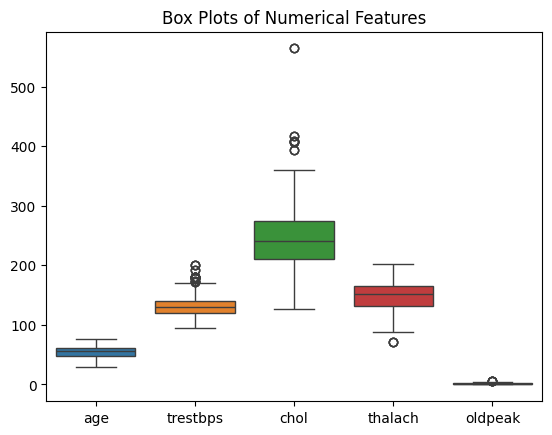

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for multiple numerical columns
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Box Plots of Numerical Features')
plt.show()

In [ ]:
import pandas as pd

def remove_outliers_iqr(df, columns):

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the columns containing numerical features with potential outliers
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Remove outliers from the DataFrame
df_no_outliers = remove_outliers_iqr(df, numerical_columns)

# Print the shape of the original and cleaned DataFrames
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after outlier removal:", df_no_outliers.shape)

Original DataFrame shape: (1025, 14)
DataFrame shape after outlier removal: (964, 14)


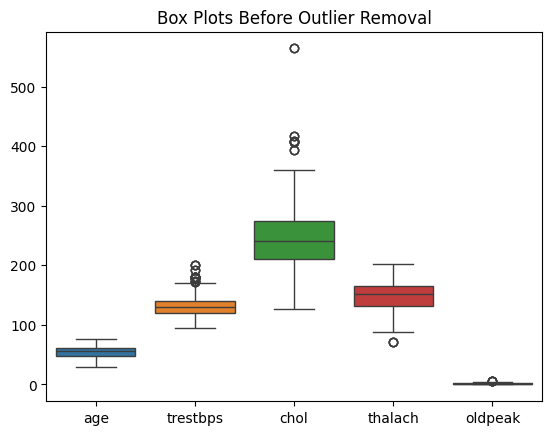

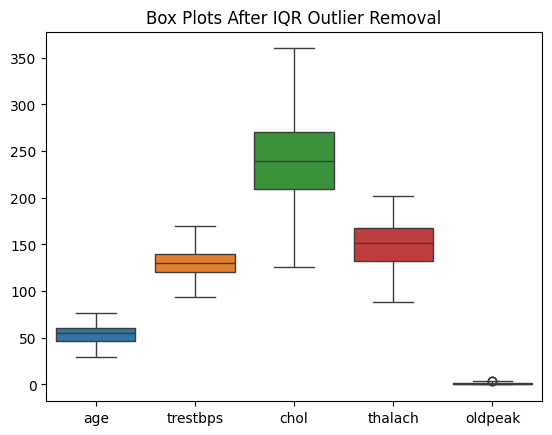

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots before outlier removal
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Box Plots Before Outlier Removal')
plt.show()

# Box plots after outlier removal
sns.boxplot(data=df_no_outliers[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Box Plots After IQR Outlier Removal')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def remove_outliers_zscore(df, columns, threshold=3):

    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[(z_scores < threshold)]
    return df

# Specify the columns containing numerical features with potential outliers
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Remove outliers from the DataFrame using Z-score method
df_no_outliers_zscore = remove_outliers_zscore(df, numerical_columns)

# Print the shape of the original and cleaned DataFrames
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after outlier removal (Z-score):", df_no_outliers_zscore.shape)

Original DataFrame shape: (1025, 14)
DataFrame shape after outlier removal (Z-score): (994, 14)


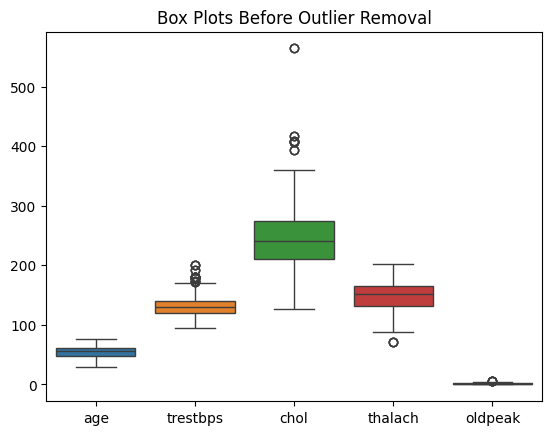

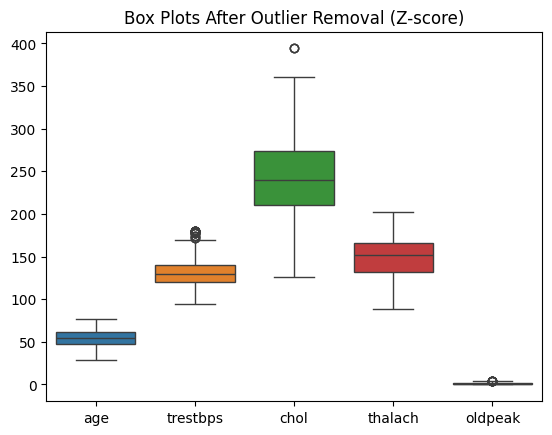

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots before outlier removal
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Box Plots Before Outlier Removal')
plt.show()

# Box plots after outlier removal (Z-score method)
sns.boxplot(data=df_no_outliers_zscore[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Box Plots After Outlier Removal (Z-score)')
plt.show()

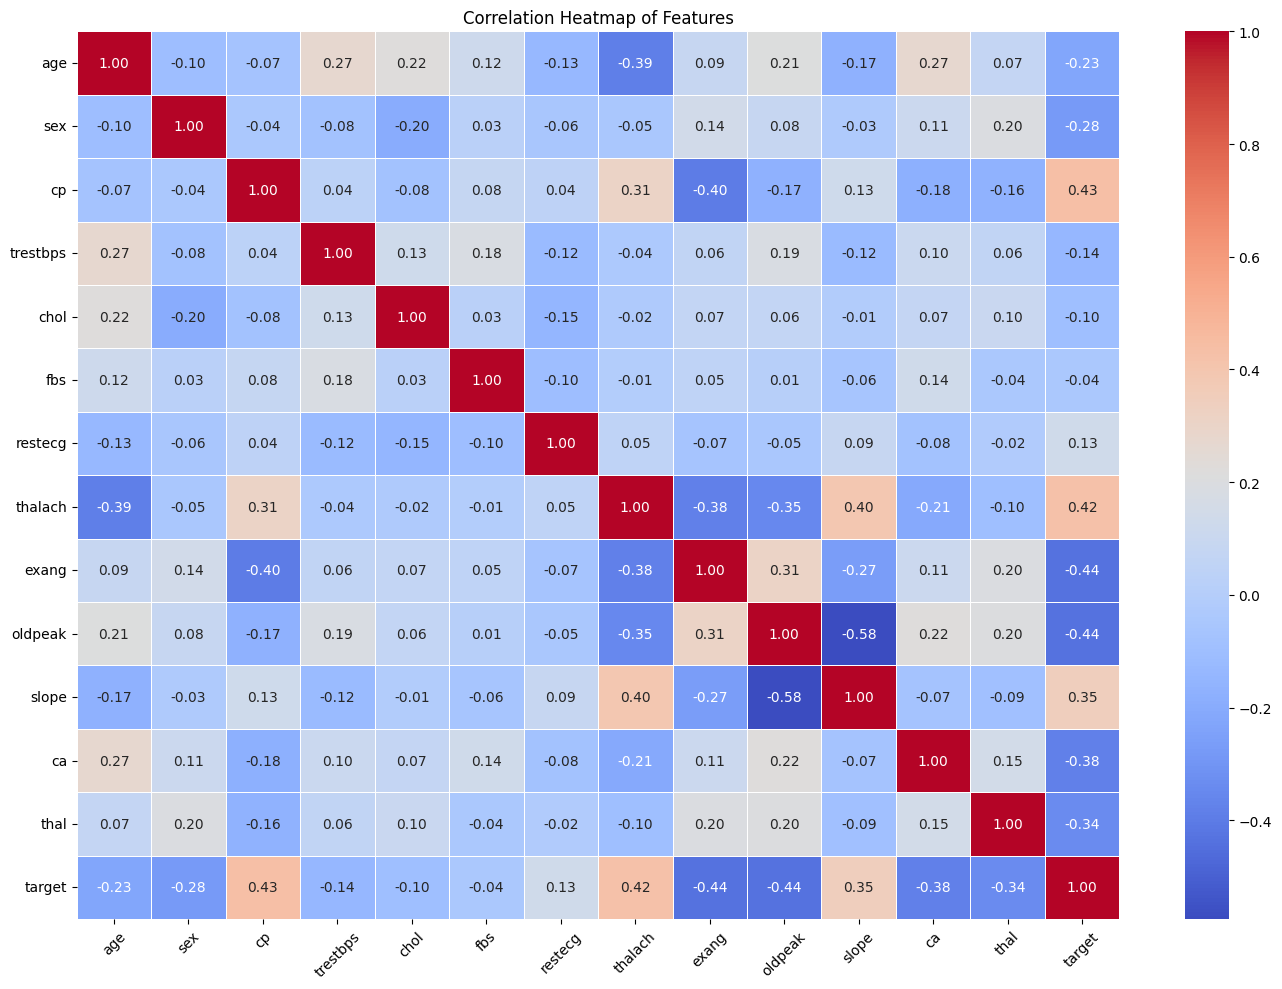

In [ ]:
#correlation matrix

plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

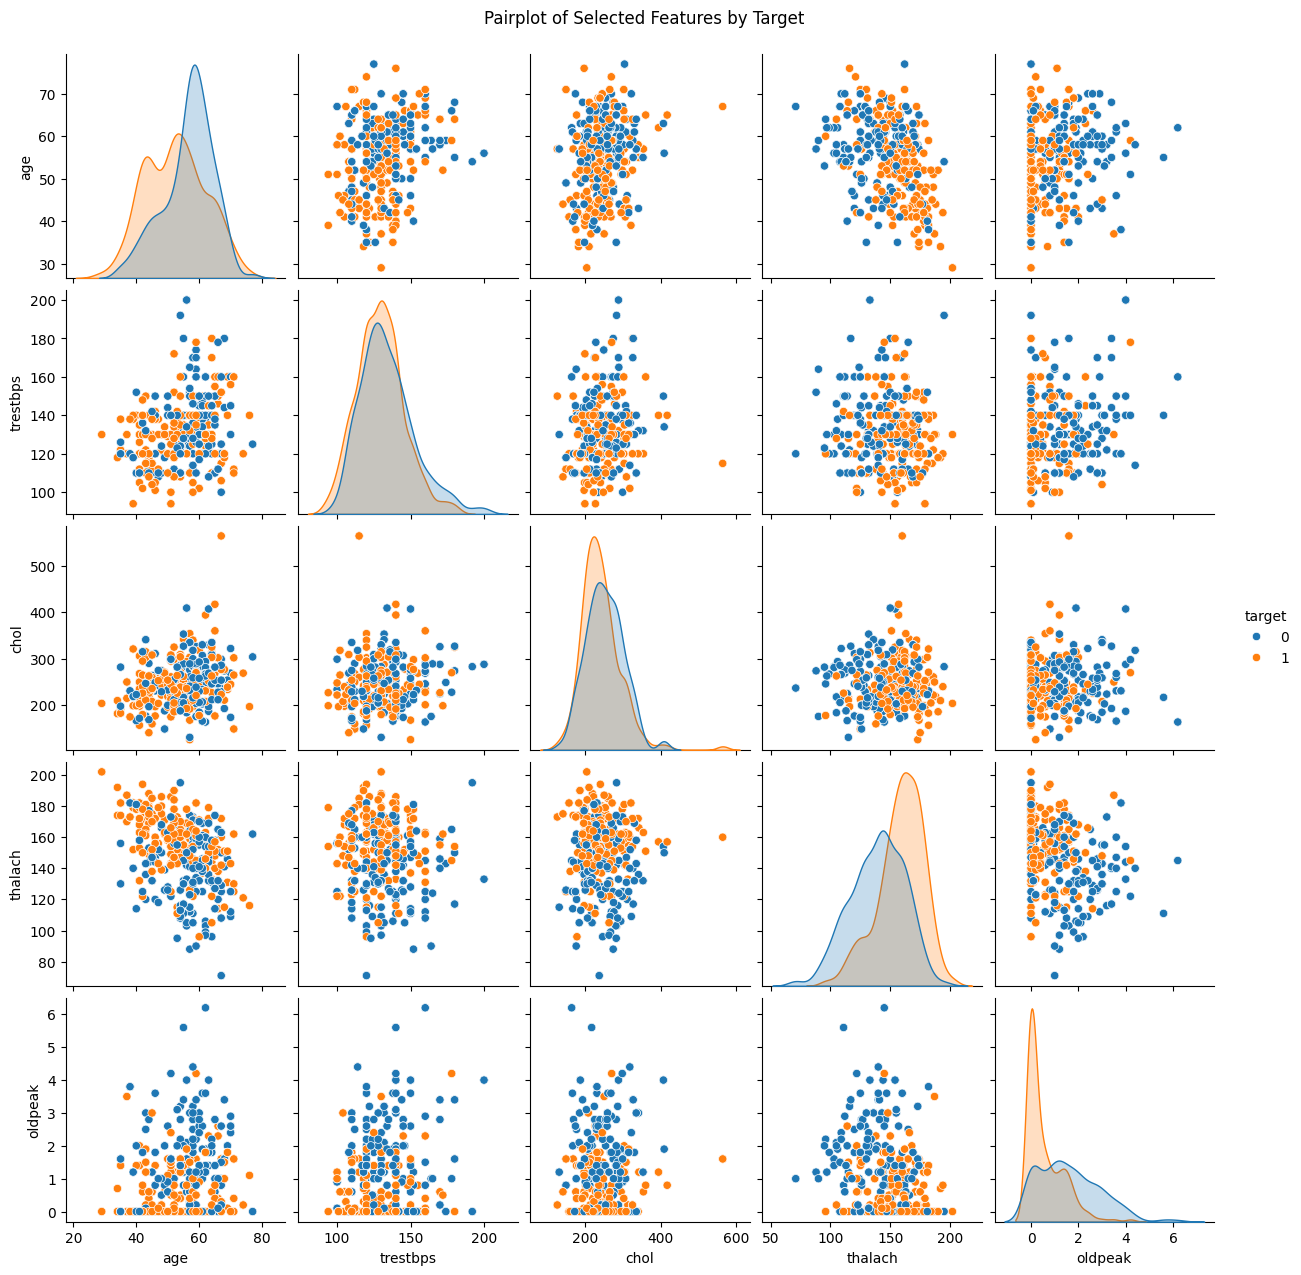

In [ ]:
sns.pairplot(df, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.suptitle("Pairplot of Selected Features by Target", y=1.02)
plt.show()

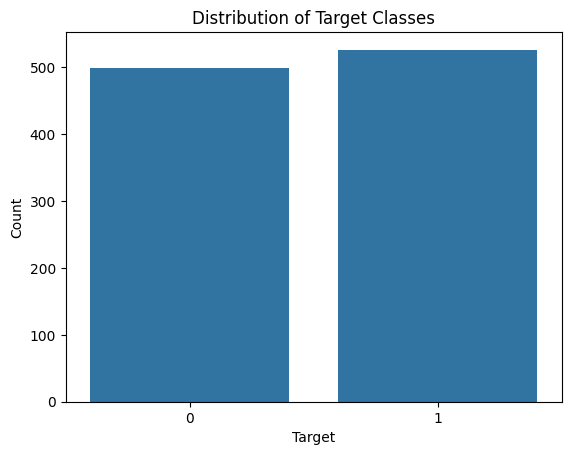

In [ ]:
sns.countplot(x='target', data=df)
plt.title("Distribution of Target Classes")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Step 0: Column definitions
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Step 1: Handle missing values
X = df_no_outliers.drop(['target'], axis=1)
y = df_no_outliers['target']

# Impute missing values
num_imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = num_imputer.fit_transform(X[numerical_columns])

cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = cat_imputer.fit_transform(X[categorical_columns])

# Step 2: Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Step 4: Preprocessing with scaling + encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Before PCA - X_train shape:", X_train_processed.shape)

# Step 5: PCA after full preprocessing
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Step 6: Print info
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total PCA Components selected:", pca.n_components_)
print("After PCA - X_train_pca shape:", X_train_pca.shape)


Before PCA - X_train shape: (812, 22)
Explained Variance Ratio: [0.27186553 0.15549093 0.1186647  0.10169396 0.07141401 0.05345133
 0.03768848 0.0324346  0.02903277 0.02233407 0.02014489 0.01907566
 0.01450257]
Total PCA Components selected: 13
After PCA - X_train_pca shape: (812, 13)


In [ ]:
preprocessor.named_transformers_['cat'].get_feature_names_out()

array(['sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2',
       'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'thal_1', 'thal_2', 'thal_3'], dtype=object)

In [ ]:
print(preprocessor.get_feature_names_out())

['num__age' 'num__trestbps' 'num__chol' 'num__thalach' 'num__oldpeak'
 'cat__sex_1' 'cat__cp_1' 'cat__cp_2' 'cat__cp_3' 'cat__fbs_1'
 'cat__restecg_1' 'cat__restecg_2' 'cat__exang_1' 'cat__slope_1'
 'cat__slope_2' 'cat__ca_1' 'cat__ca_2' 'cat__ca_3' 'cat__ca_4'
 'cat__thal_1' 'cat__thal_2' 'cat__thal_3']


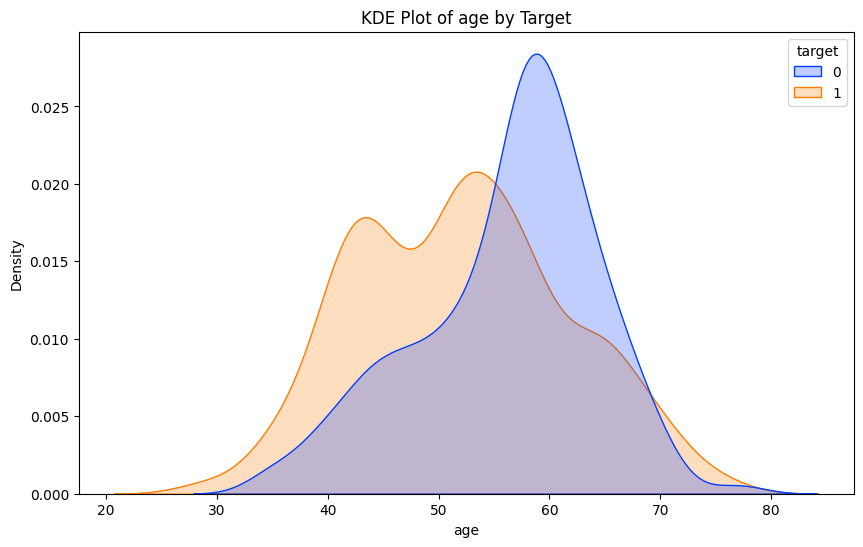

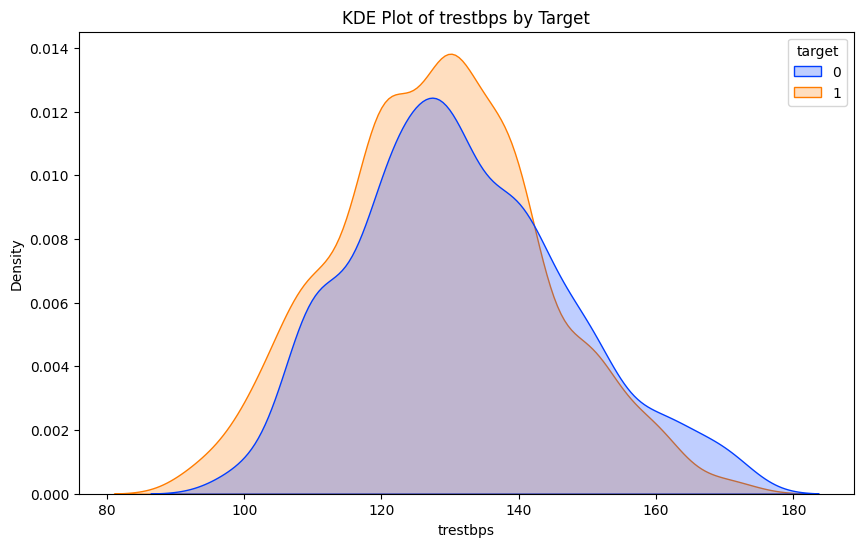

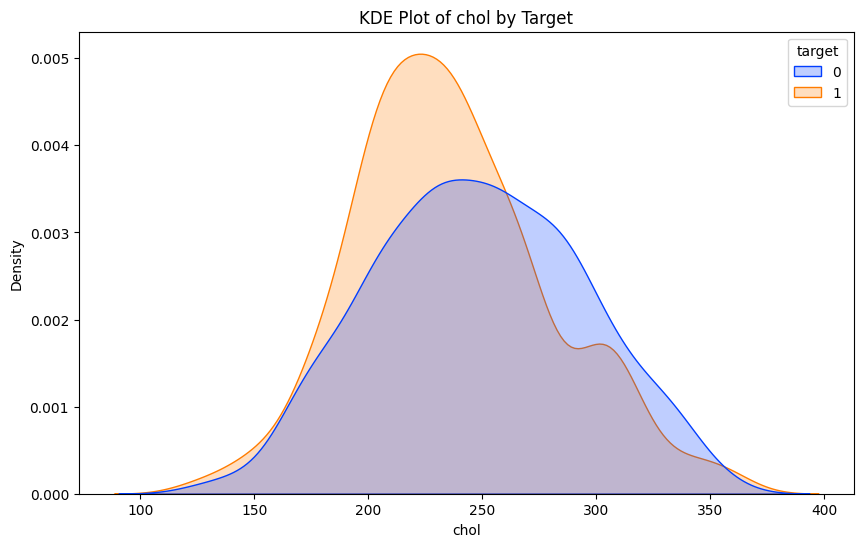

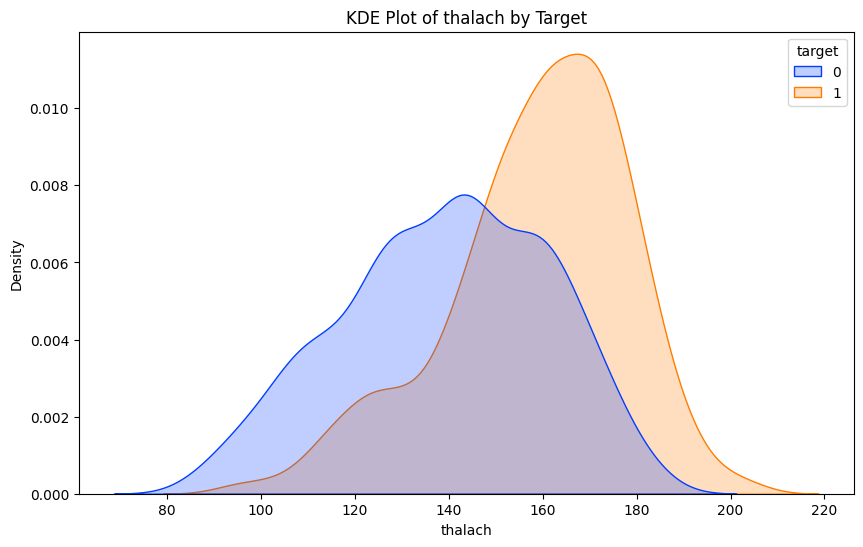

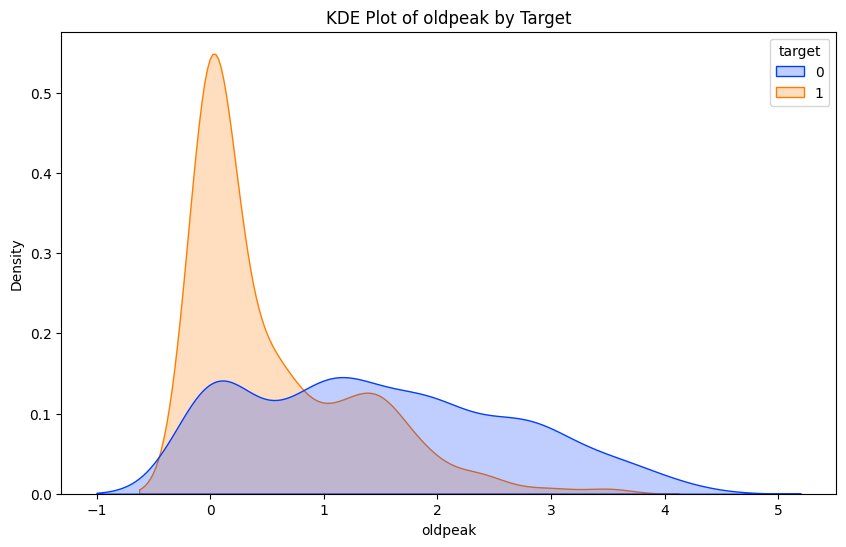

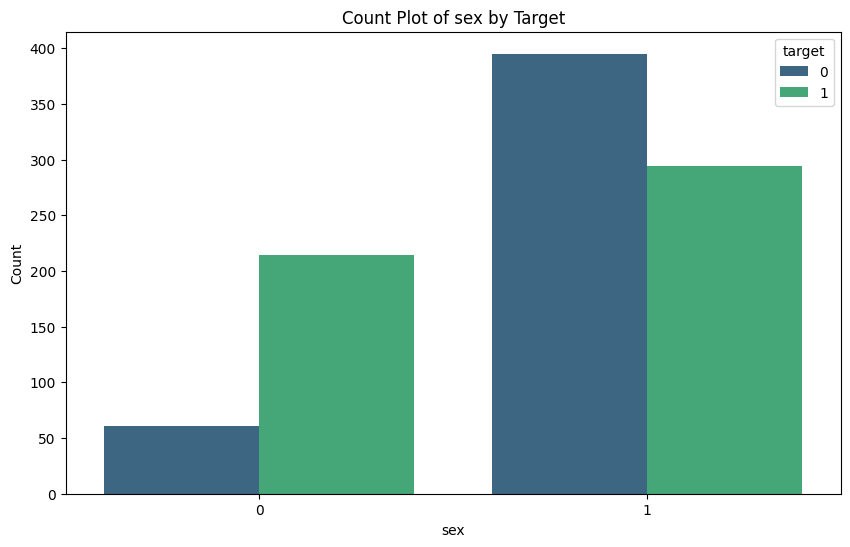

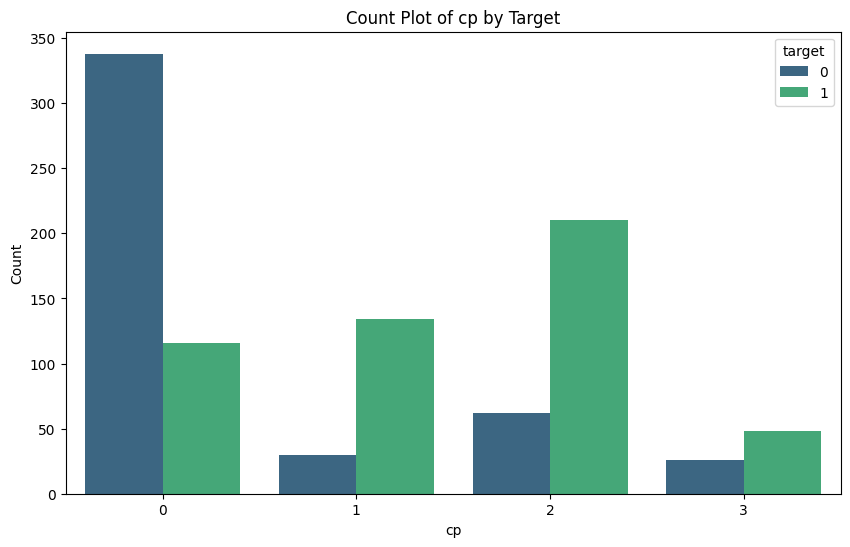

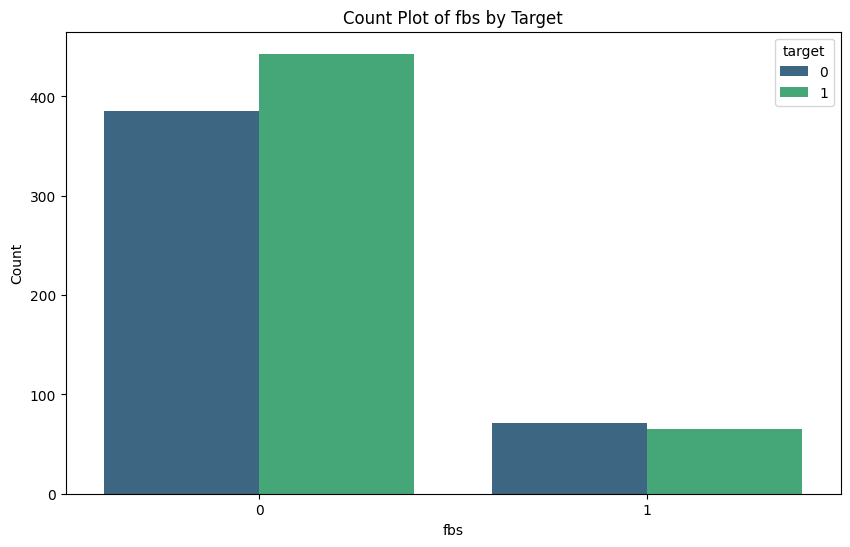

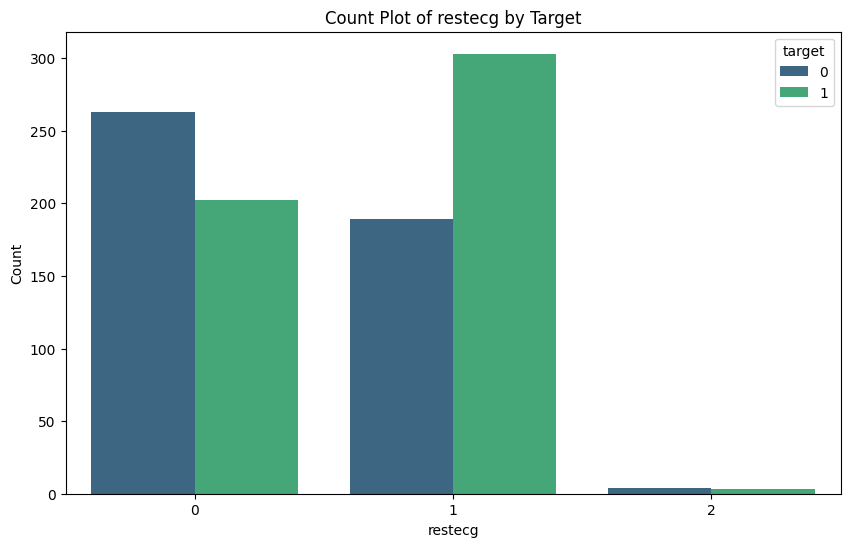

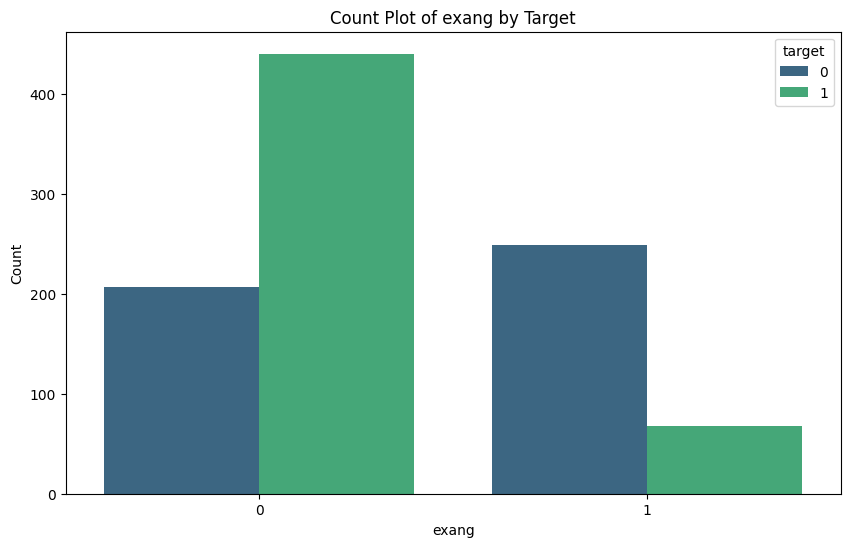

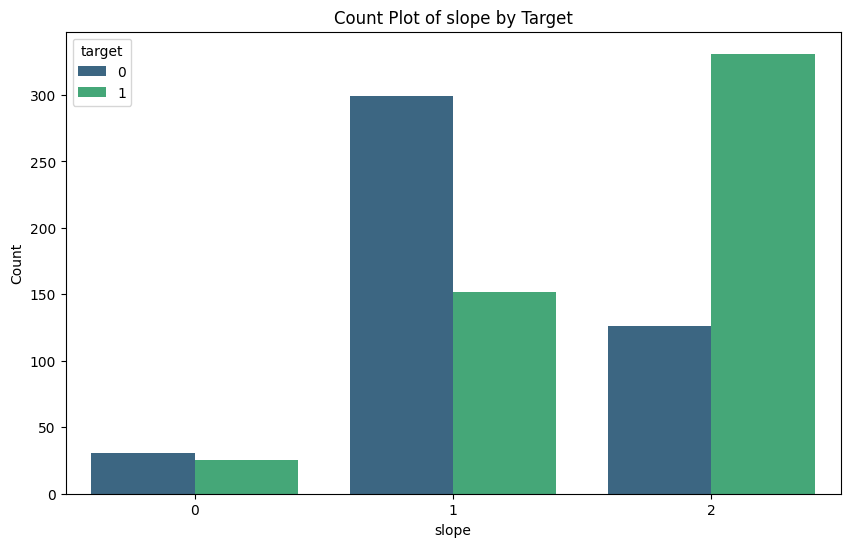

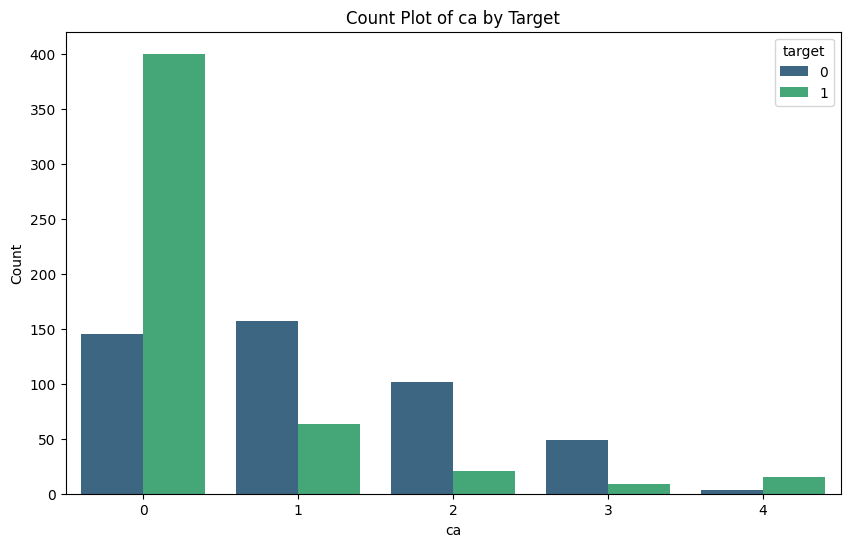

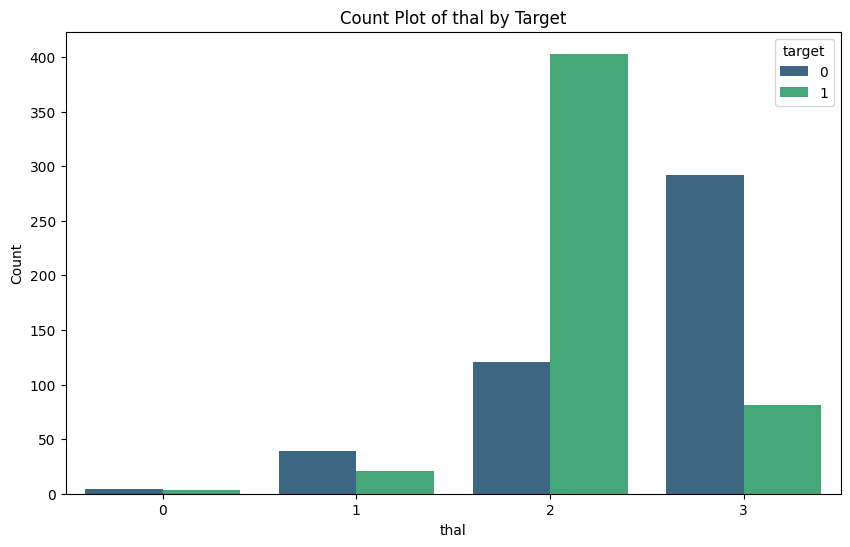

In [ ]:
# 1. KDE Plot for Numerical Columns
def plot_kde(col_name):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_no_outliers, x=col_name, hue="target", fill=True, palette="bright")
    plt.title(f"KDE Plot of {col_name} by Target")
    plt.xlabel(col_name)
    plt.ylabel("Density")
    plt.show()

# 2. Count Plot for Categorical Columns
def plot_count(col_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_no_outliers, x=col_name, hue="target", palette="viridis")
    plt.title(f"Count Plot of {col_name} by Target")
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

# Plotting for all numerical columns
for col in numerical_columns:
    plot_kde(col)

# Plotting for all categorical columns
for col in categorical_columns:
    plot_count(col)

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 1: Feature Scaling(standardize data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Step 2: Covariance Matrix, Eigenvalues, and Eigenvectors
# Calculate the covariance matrix of the scaled features
cov_matrix = np.cov(X_train_scaled, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Display the covariance matrix, eigenvalues, and eigenvectors
print("Covariance Matrix:\n", cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Covariance Matrix:
 [[ 1.00123305  0.288155    0.20221587 -0.37063896  0.21207883]
 [ 0.288155    1.00123305  0.13324315 -0.05901936  0.15743427]
 [ 0.20221587  0.13324315  1.00123305 -0.0722265   0.02346348]
 [-0.37063896 -0.05901936 -0.0722265   1.00123305 -0.36178493]
 [ 0.21207883  0.15743427  0.02346348 -0.36178493  1.00123305]]
Eigenvalues:
 [0.51430967 0.72699493 0.88241841 1.07768992 1.8047523 ]
Eigenvectors:
 [[-0.57774312 -0.57475677  0.03201353 -0.1474561  -0.55955284]
 [ 0.35835539  0.07668385 -0.72591194 -0.44725998 -0.37243974]
 [ 0.0630355   0.3903626   0.60242301 -0.64174663 -0.26247161]
 [-0.6437416   0.23399201 -0.30200089 -0.41567327  0.51658076]
 [-0.34556849  0.67575071 -0.13382435  0.43999115 -0.46091456]]


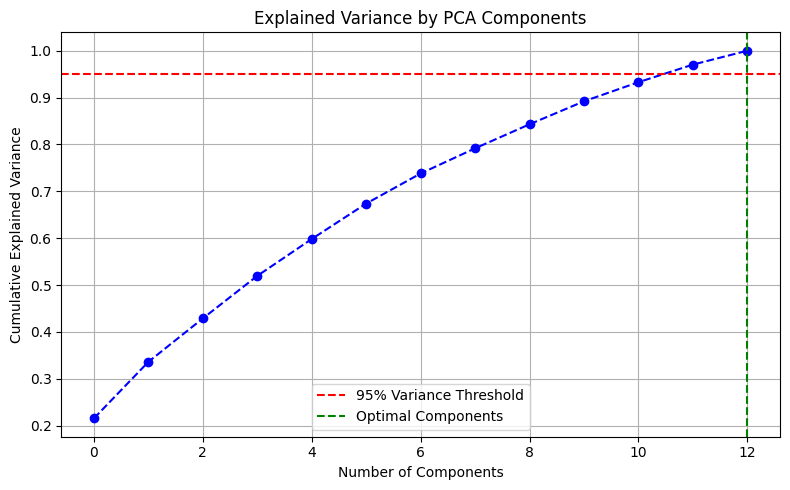

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA()
pca_full.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95)+1, color='g', linestyle='--', label='Optimal Components')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Combining PCA Features with Categorical Features
# Convert PCA-transformed features into DataFrames

pca_columns = [f"PC{i+1}" for i in range(pca.n_components_)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns, index=X_train.index)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns, index=X_test.index)

# Get categorical features
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]

# Combine PCA features with categorical features
X_train_combined = pd.concat([X_train_pca_df.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([X_test_pca_df.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

Logistic Regression on Original Features by Hyperparameter Tuning:
Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Accuracy: 0.8333333333333334
Precision: 0.7777777777777778
Recall: 0.9191919191919192
F1 Score: 0.8425925925925926


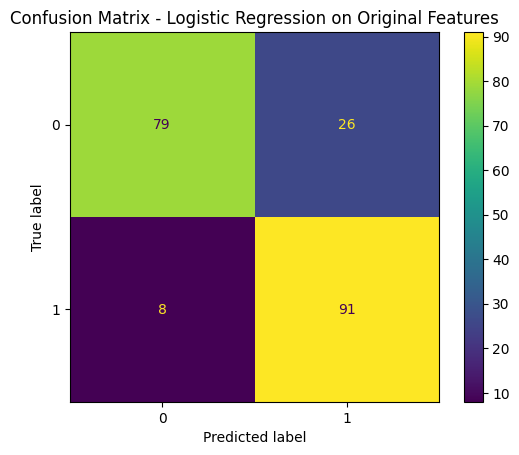


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       105
           1       0.78      0.92      0.84        99

    accuracy                           0.83       204
   macro avg       0.84      0.84      0.83       204
weighted avg       0.84      0.83      0.83       204


Logistic Regression on PCA-Transformed Features by Hyperparameter Tuning:
Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Accuracy: 0.8480392156862745
Precision: 0.8035714285714286
Recall: 0.9090909090909091
F1 Score: 0.8530805687203792


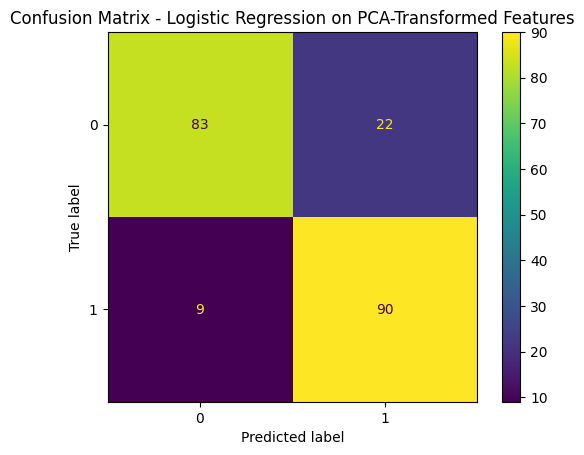


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       105
           1       0.80      0.91      0.85        99

    accuracy                           0.85       204
   macro avg       0.85      0.85      0.85       204
weighted avg       0.85      0.85      0.85       204



In [ ]:
# Parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01],           # Regularization strength
    'solver': ['liblinear', 'lbfgs']         # Solvers to handle different types of datasets
}

# Step 2: Hyperparameter tuning for Logistic Regression on original features
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr_original = grid_search_lr.best_estimator_

# Logistic Regression on original features
y_pred_lr_original = best_lr_original.predict(X_test)
print("Logistic Regression on Original Features by Hyperparameter Tuning:")
print("Best Parameters:", grid_search_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr_original))
print("Precision:", precision_score(y_test, y_pred_lr_original))
print("Recall:", recall_score(y_test, y_pred_lr_original))
print("F1 Score:", f1_score(y_test, y_pred_lr_original))

# Confusion Matrix for Logistic Regression on Original Features
cm_lr_original = confusion_matrix(y_test, y_pred_lr_original)
ConfusionMatrixDisplay(cm_lr_original).plot()
plt.title("Confusion Matrix - Logistic Regression on Original Features")
plt.show()

# Classification Report for Logistic Regression on Original Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_original))


# Hyperparameter tuning for Logistic Regression on PCA-transformed features
grid_search_lr_pca = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_pca.fit(X_train_combined, y_train)
best_lr_pca = grid_search_lr_pca.best_estimator_

# Logistic Regression on PCA-transformed features
y_pred_lr_pca = best_lr_pca.predict(X_test_combined)
print("\nLogistic Regression on PCA-Transformed Features by Hyperparameter Tuning:")
print("Best Parameters:", grid_search_lr_pca.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr_pca))
print("Precision:", precision_score(y_test, y_pred_lr_pca))
print("Recall:", recall_score(y_test, y_pred_lr_pca))
print("F1 Score:", f1_score(y_test, y_pred_lr_pca))

# Confusion Matrix for Logistic Regression on PCA-Transformed Features
cm_lr_pca = confusion_matrix(y_test, y_pred_lr_pca)
ConfusionMatrixDisplay(cm_lr_pca).plot()
plt.title("Confusion Matrix - Logistic Regression on PCA-Transformed Features")
plt.show()

# Classification Report for Logistic Regression on PCA-Transformed Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_pca))



AdaBoost on Original Features:
Best Parameters: {'learning_rate': 1, 'n_estimators': 300}
Accuracy: 0.9264705882352942
Precision: 0.92
Recall: 0.9292929292929293
F1 Score: 0.9246231155778895


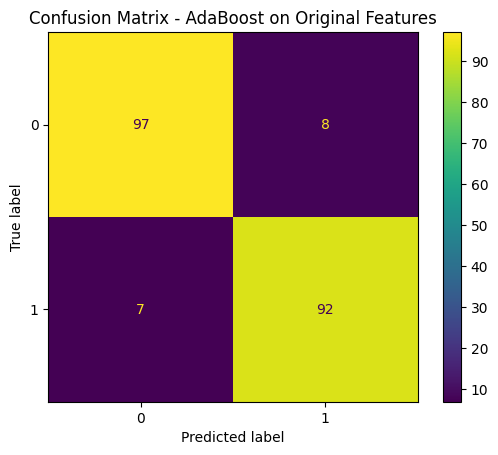


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       105
           1       0.92      0.93      0.92        99

    accuracy                           0.93       204
   macro avg       0.93      0.93      0.93       204
weighted avg       0.93      0.93      0.93       204


AdaBoost on PCA-Transformed Features:
Best Parameters: {'learning_rate': 1, 'n_estimators': 300}
Accuracy: 0.9558823529411765
Precision: 0.96875
Recall: 0.9393939393939394
F1 Score: 0.9538461538461539


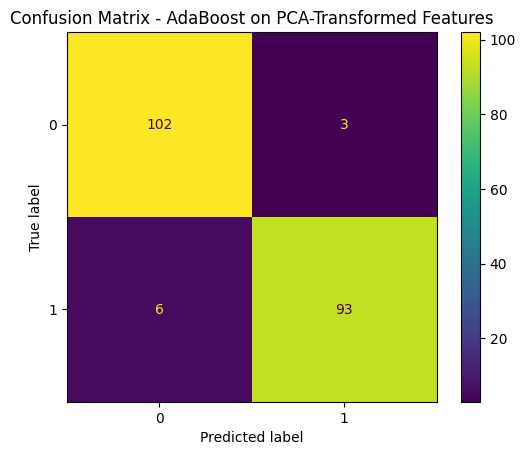


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.97      0.94      0.95        99

    accuracy                           0.96       204
   macro avg       0.96      0.96      0.96       204
weighted avg       0.96      0.96      0.96       204



In [ ]:
# Step 1: Define parameter grids for each model
from sklearn.ensemble import RandomForestClassifier

# Parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300],          # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]          # Learning rate
}

# Step 2: Hyperparameter tuning for AdaBoost on original features
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)
best_ada_original = grid_search_ada.best_estimator_

# AdaBoost on original features
y_pred_ada_original = best_ada_original.predict(X_test)
print("\nAdaBoost on Original Features:")
print("Best Parameters:", grid_search_ada.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_ada_original))
print("Precision:", precision_score(y_test, y_pred_ada_original))
print("Recall:", recall_score(y_test, y_pred_ada_original))
print("F1 Score:", f1_score(y_test, y_pred_ada_original))

# Confusion Matrix for AdaBoost on Original Features
cm_ada_original = confusion_matrix(y_test, y_pred_ada_original)
ConfusionMatrixDisplay(cm_ada_original).plot()
plt.title("Confusion Matrix - AdaBoost on Original Features")
plt.show()

# Classification Report for AdaBoost on Original Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada_original))


# Hyperparameter tuning for AdaBoost on PCA-transformed features
grid_search_ada_pca = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada_pca.fit(X_train_combined, y_train)
best_ada_pca = grid_search_ada_pca.best_estimator_

# AdaBoost on PCA-transformed features
y_pred_ada_pca = best_ada_pca.predict(X_test_combined)
print("\nAdaBoost on PCA-Transformed Features:")
print("Best Parameters:", grid_search_ada_pca.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_ada_pca))
print("Precision:", precision_score(y_test, y_pred_ada_pca))
print("Recall:", recall_score(y_test, y_pred_ada_pca))
print("F1 Score:", f1_score(y_test, y_pred_ada_pca))

# Confusion Matrix for AdaBoost on PCA-Transformed Features
cm_ada_pca = confusion_matrix(y_test, y_pred_ada_pca)
ConfusionMatrixDisplay(cm_ada_pca).plot()
plt.title("Confusion Matrix - AdaBoost on PCA-Transformed Features")
plt.show()

# Classification Report for AdaBoost on PCA-Transformed Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada_pca))



Random Forest on Original Features:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


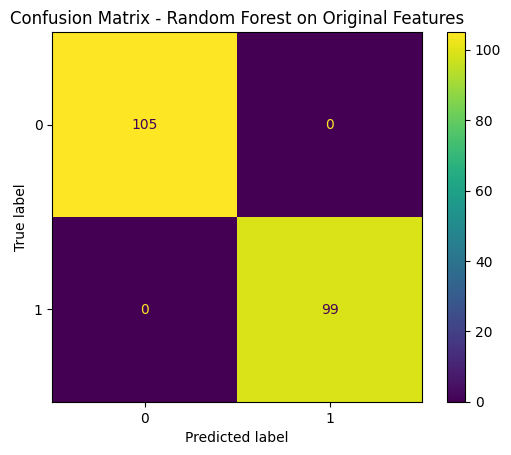


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        99

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204


Random Forest on PCA-Transformed Features:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9950980392156863
Precision: 0.99
Recall: 1.0
F1 Score: 0.9949748743718593


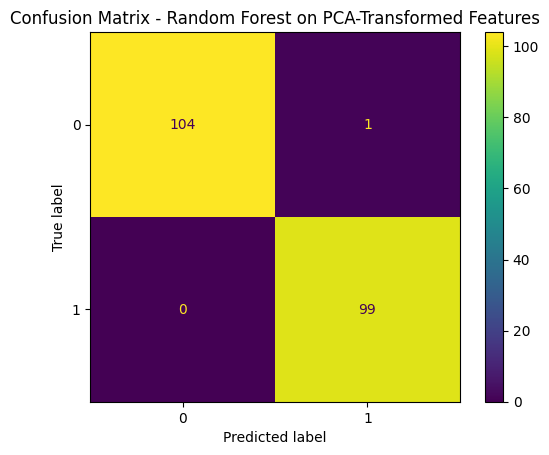


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.99      1.00      0.99        99

    accuracy                           1.00       204
   macro avg       0.99      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 1. Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Hyperparameter tuning for Random Forest on original features
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_original = grid_search_rf.best_estimator_

# Random Forest on original features
y_pred_rf_original = best_rf_original.predict(X_test)
print("\nRandom Forest on Original Features:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_original))
print("Precision:", precision_score(y_test, y_pred_rf_original))
print("Recall:", recall_score(y_test, y_pred_rf_original))
print("F1 Score:", f1_score(y_test, y_pred_rf_original))

# Confusion Matrix for Random Forest on Original Features
cm_rf_original = confusion_matrix(y_test, y_pred_rf_original)
ConfusionMatrixDisplay(cm_rf_original).plot()
plt.title("Confusion Matrix - Random Forest on Original Features")
plt.show()

# Classification Report for Random Forest on Original Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_original))


# 3. Hyperparameter tuning for Random Forest on PCA-transformed features
grid_search_rf_pca = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf_pca.fit(X_train_combined, y_train)
best_rf_pca = grid_search_rf_pca.best_estimator_

# Random Forest on PCA-transformed features
y_pred_rf_pca = best_rf_pca.predict(X_test_combined)
print("\nRandom Forest on PCA-Transformed Features:")
print("Best Parameters:", grid_search_rf_pca.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_pca))
print("Precision:", precision_score(y_test, y_pred_rf_pca))
print("Recall:", recall_score(y_test, y_pred_rf_pca))
print("F1 Score:", f1_score(y_test, y_pred_rf_pca))

# Confusion Matrix for Random Forest on PCA-Transformed Features
cm_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)
ConfusionMatrixDisplay(cm_rf_pca).plot()
plt.title("Confusion Matrix - Random Forest on PCA-Transformed Features")
plt.show()

# Classification Report for Random Forest on PCA-Transformed Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_pca))



KNN on Original Features:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.9607843137254902
Precision: 0.9595959595959596
Recall: 0.9595959595959596
F1 Score: 0.9595959595959596


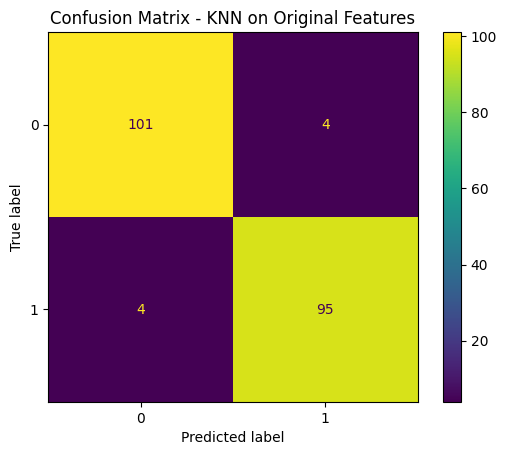


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.96      0.96      0.96        99

    accuracy                           0.96       204
   macro avg       0.96      0.96      0.96       204
weighted avg       0.96      0.96      0.96       204


KNN on PCA-Transformed Features:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.946078431372549
Precision: 0.9150943396226415
Recall: 0.9797979797979798
F1 Score: 0.9463414634146341


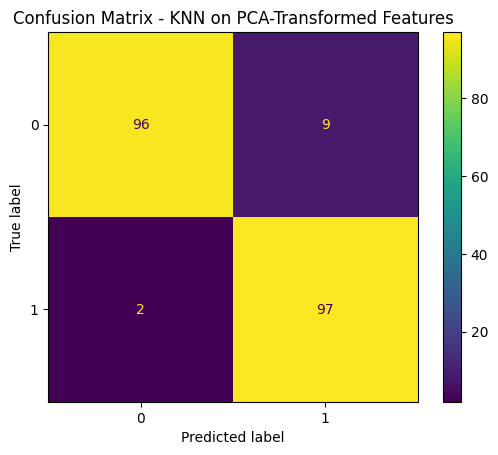


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       105
           1       0.92      0.98      0.95        99

    accuracy                           0.95       204
   macro avg       0.95      0.95      0.95       204
weighted avg       0.95      0.95      0.95       204



In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier

# Split data into training and test sets (assuming X_resampled, y_resampled, X_train_combined, X_test_combined are already defined)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 1. Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# 2. Hyperparameter tuning for KNN on original features
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn_original = grid_search_knn.best_estimator_

# KNN on original features
y_pred_knn_original = best_knn_original.predict(X_test)
print("\nKNN on Original Features:")
print("Best Parameters:", grid_search_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn_original))
print("Precision:", precision_score(y_test, y_pred_knn_original))
print("Recall:", recall_score(y_test, y_pred_knn_original))
print("F1 Score:", f1_score(y_test, y_pred_knn_original))

# Confusion Matrix for KNN on Original Features
cm_knn_original = confusion_matrix(y_test, y_pred_knn_original)
ConfusionMatrixDisplay(cm_knn_original).plot()
plt.title("Confusion Matrix - KNN on Original Features")
plt.show()

# Classification Report for KNN on Original Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn_original))


# 3. Hyperparameter tuning for KNN on PCA-transformed features
grid_search_knn_pca = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn_pca.fit(X_train_combined, y_train)
best_knn_pca = grid_search_knn_pca.best_estimator_

# KNN on PCA-transformed features
y_pred_knn_pca = best_knn_pca.predict(X_test_combined)
print("\nKNN on PCA-Transformed Features:")
print("Best Parameters:", grid_search_knn_pca.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn_pca))
print("Precision:", precision_score(y_test, y_pred_knn_pca))
print("Recall:", recall_score(y_test, y_pred_knn_pca))
print("F1 Score:", f1_score(y_test, y_pred_knn_pca))

# Confusion Matrix for KNN on PCA-Transformed Features
cm_knn_pca = confusion_matrix(y_test, y_pred_knn_pca)
ConfusionMatrixDisplay(cm_knn_pca).plot()
plt.title("Confusion Matrix - KNN on PCA-Transformed Features")
plt.show()

# Classification Report for KNN on
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn_pca))



Decision Tree on Original Features:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9803921568627451
Precision: 0.9611650485436893
Recall: 1.0
F1 Score: 0.9801980198019802


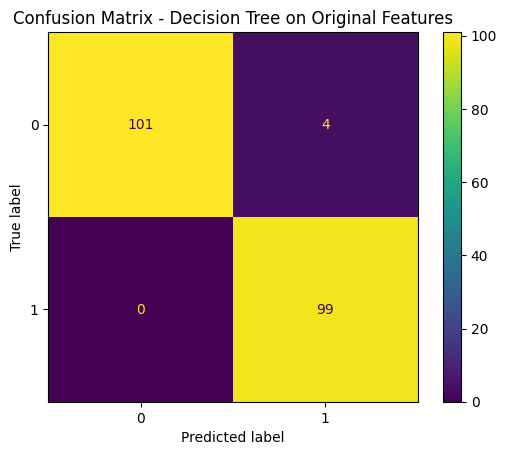


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.96      1.00      0.98        99

    accuracy                           0.98       204
   macro avg       0.98      0.98      0.98       204
weighted avg       0.98      0.98      0.98       204


Decision Tree on PCA-Transformed Features:
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


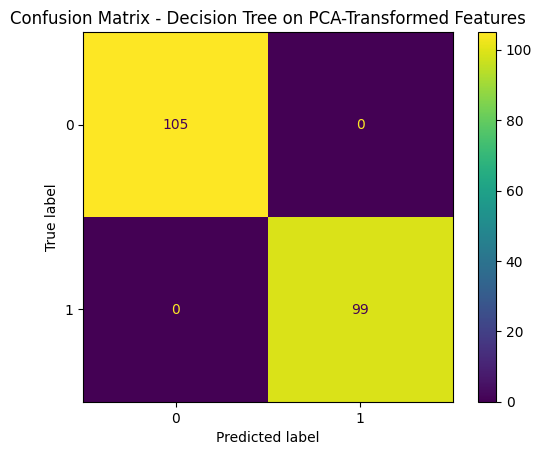


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        99

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 1. Define parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# 2. Hyperparameter tuning for Decision Tree on original features
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_processed, y_train)
best_dt_original = grid_search_dt.best_estimator_

# Decision Tree on original features
y_pred_dt_original = best_dt_original.predict(X_test_processed)
print("\nDecision Tree on Original Features:")
print("Best Parameters:", grid_search_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt_original))
print("Precision:", precision_score(y_test, y_pred_dt_original))
print("Recall:", recall_score(y_test, y_pred_dt_original))
print("F1 Score:", f1_score(y_test, y_pred_dt_original))

# Confusion Matrix for Decision Tree on Original Features
cm_dt_original = confusion_matrix(y_test, y_pred_dt_original)
ConfusionMatrixDisplay(cm_dt_original).plot()
plt.title("Confusion Matrix - Decision Tree on Original Features")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_original))


# 3. Hyperparameter tuning for Decision Tree on PCA-transformed features
grid_search_dt_pca = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt_pca.fit(X_train_combined, y_train)
best_dt_pca = grid_search_dt_pca.best_estimator_

# Decision Tree on PCA-transformed features
y_pred_dt_pca = best_dt_pca.predict(X_test_combined)
print("\nDecision Tree on PCA-Transformed Features:")
print("Best Parameters:", grid_search_dt_pca.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt_pca))
print("Precision:", precision_score(y_test, y_pred_dt_pca))
print("Recall:", recall_score(y_test, y_pred_dt_pca))
print("F1 Score:", f1_score(y_test, y_pred_dt_pca))

# Confusion Matrix for Decision Tree on PCA-Transformed Features
cm_dt_pca = confusion_matrix(y_test, y_pred_dt_pca)
ConfusionMatrixDisplay(cm_dt_pca).plot()
plt.title("Confusion Matrix - Decision Tree on PCA-Transformed Features")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_pca))



SVC on Original Features:
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


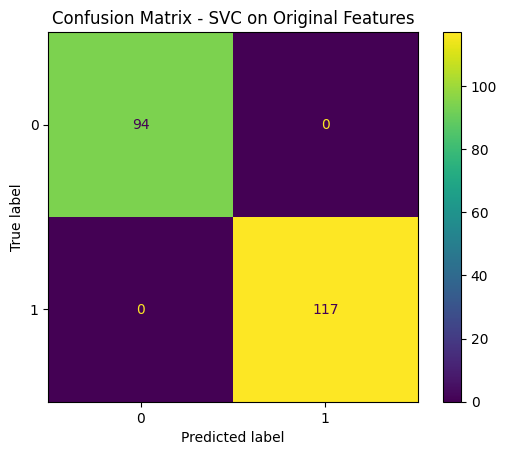


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       117

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211


SVC on PCA-Transformed Features:
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.976303317535545
Precision: 0.9745762711864406
Recall: 0.9829059829059829
F1 Score: 0.9787234042553191


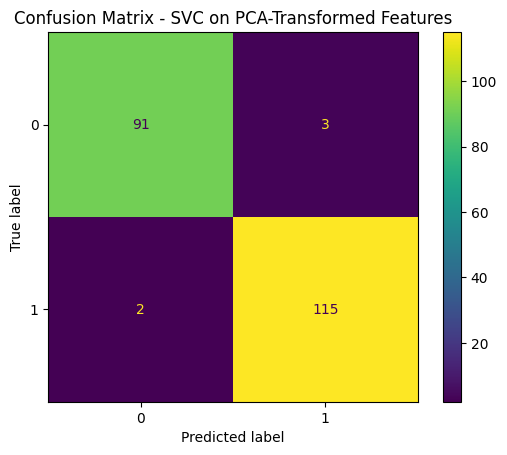


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        94
           1       0.97      0.98      0.98       117

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        94
           1       0.97      0.98      0.98       117

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Define parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Assuming X_train, y_train, X_test, y_test, X_train_combined, X_test_combined are already defined

# 2. Hyperparameter tuning for SVC on original features
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_processed, y_train)
best_svc_original = grid_search_svc.best_estimator_

# SVC on original features
y_pred_svc_original = best_svc_original.predict(X_test_processed)
print("\nSVC on Original Features:")
print("Best Parameters:", grid_search_svc.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svc_original))
print("Precision:", precision_score(y_test, y_pred_svc_original))
print("Recall:", recall_score(y_test, y_pred_svc_original))
print("F1 Score:", f1_score(y_test, y_pred_svc_original))

# Confusion Matrix for SVC on Original Features
cm_svc_original = confusion_matrix(y_test, y_pred_svc_original)
ConfusionMatrixDisplay(cm_svc_original).plot()
plt.title("Confusion Matrix - SVC on Original Features")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_original))


# 3. Hyperparameter tuning for SVC on PCA-transformed features
grid_search_svc_pca = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc_pca.fit(X_train_combined, y_train)
best_svc_pca = grid_search_svc_pca.best_estimator_

# SVC on PCA-transformed features
y_pred_svc_pca = best_svc_pca.predict(X_test_combined)
print("\nSVC on PCA-Transformed Features:")
print("Best Parameters:", grid_search_svc_pca.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svc_pca))
print("Precision:", precision_score(y_test, y_pred_svc_pca))
print("Recall:", recall_score(y_test, y_pred_svc_pca))
print("F1 Score:", f1_score(y_test, y_pred_svc_pca))

# Confusion Matrix for SVC on PCA-Transformed Features
cm_svc_pca = confusion_matrix(y_test, y_pred_svc_pca)
ConfusionMatrixDisplay(cm_svc_pca).plot()
plt.title("Confusion Matrix - SVC on PCA-Transformed Features")
plt.show()
# Classification Report for SVC on PCA-Transformed Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_pca))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_pca))




XGBoost on Original Features:
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Accuracy: 0.9803921568627451
Precision: 0.9797979797979798
Recall: 0.9797979797979798
F1 Score: 0.9797979797979798


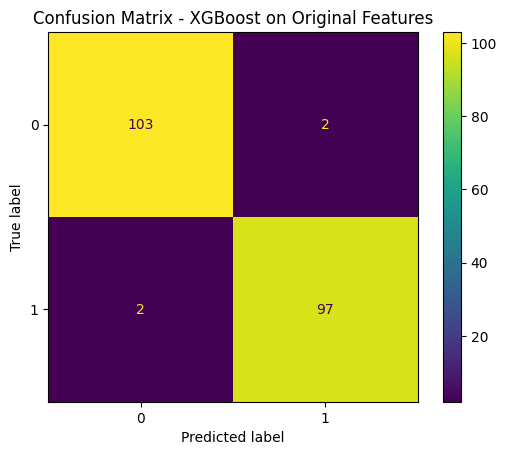


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       105
           1       0.98      0.98      0.98        99

    accuracy                           0.98       204
   macro avg       0.98      0.98      0.98       204
weighted avg       0.98      0.98      0.98       204


XGBoost on PCA-Transformed Features:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Accuracy: 0.9950980392156863
Precision: 0.99
Recall: 1.0
F1 Score: 0.9949748743718593


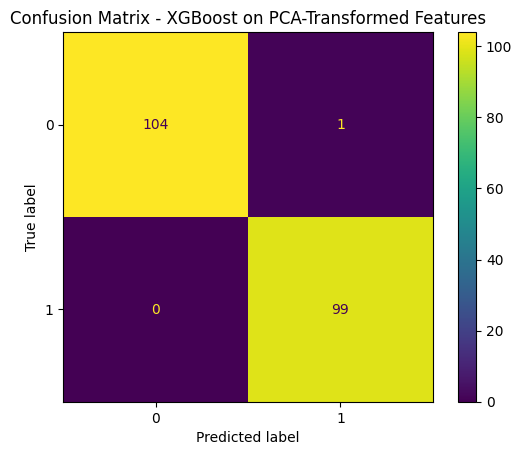


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.99      1.00      0.99        99

    accuracy                           1.00       204
   macro avg       0.99      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



In [ ]:
from xgboost import XGBClassifier

# 1. Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree
}

# 2. Hyperparameter tuning for XGBoost on original features
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                               param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
best_xgb_original = grid_search_xgb.best_estimator_

# XGBoost on original features
y_pred_xgb_original = best_xgb_original.predict(X_test)
print("\nXGBoost on Original Features:")
print("Best Parameters:", grid_search_xgb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Precision:", precision_score(y_test, y_pred_xgb_original))
print("Recall:", recall_score(y_test, y_pred_xgb_original))
print("F1 Score:", f1_score(y_test, y_pred_xgb_original))

# Confusion Matrix for XGBoost on Original Features
cm_xgb_original = confusion_matrix(y_test, y_pred_xgb_original)
ConfusionMatrixDisplay(cm_xgb_original).plot()
plt.title("Confusion Matrix - XGBoost on Original Features")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_original))


# 3. Hyperparameter tuning for XGBoost on PCA-transformed features
grid_search_xgb_pca = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                                   param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb_pca.fit(X_train_combined, y_train)
best_xgb_pca = grid_search_xgb_pca.best_estimator_

# XGBoost on PCA-transformed features
y_pred_xgb_pca = best_xgb_pca.predict(X_test_combined)
print("\nXGBoost on PCA-Transformed Features:")
print("Best Parameters:", grid_search_xgb_pca.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_pca))
print("Precision:", precision_score(y_test, y_pred_xgb_pca))
print("Recall:", recall_score(y_test, y_pred_xgb_pca))
print("F1 Score:", f1_score(y_test, y_pred_xgb_pca))

# Confusion Matrix for XGBoost on PCA-Transformed Features
cm_xgb_pca = confusion_matrix(y_test, y_pred_xgb_pca)
ConfusionMatrixDisplay(cm_xgb_pca).plot()
plt.title("Confusion Matrix - XGBoost on PCA-Transformed Features")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_pca))



MLP on Original Features:
Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 0.8720379146919431
Precision: 0.8461538461538461
Recall: 0.9401709401709402
F1 Score: 0.8906882591093117

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        94
           1       0.85      0.94      0.89       117

    accuracy                           0.87       211
   macro avg       0.88      0.86      0.87       211
weighted avg       0.88      0.87      0.87       211



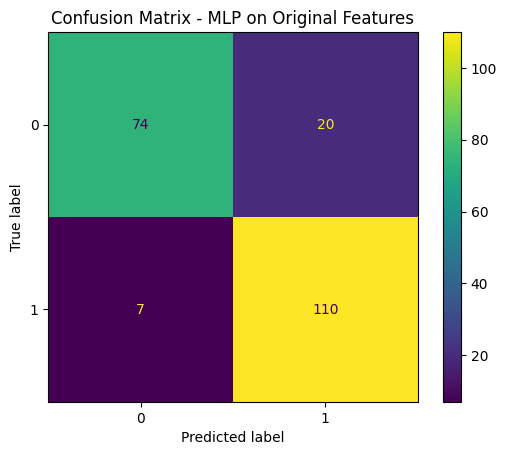


MLP on PCA-Transformed Features:
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       117

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



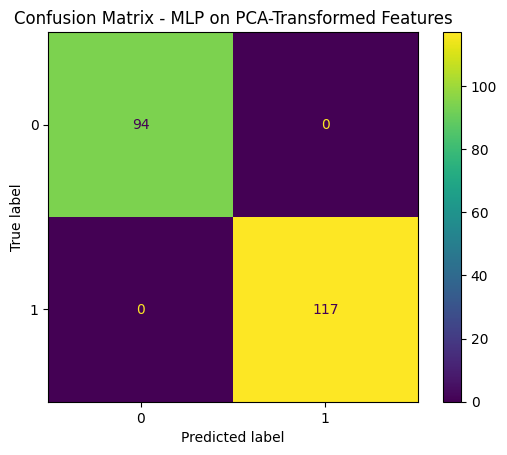

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# 1. Define parameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Different hidden layer architectures
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimization algorithms
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedules
}

# Assuming X_train, y_train, X_test, y_test, X_train_combined, X_test_combined are already defined

# 2. Hyperparameter tuning for MLP on original features
grid_search_mlp = GridSearchCV(MLPClassifier(random_state=42, max_iter=500), param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)
best_mlp_original = grid_search_mlp.best_estimator_

# MLP on original features
y_pred_mlp_original = best_mlp_original.predict(X_test)
print("\nMLP on Original Features:")
print("Best Parameters:", grid_search_mlp.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_mlp_original))
print("Precision:", precision_score(y_test, y_pred_mlp_original))
print("Recall:", recall_score(y_test, y_pred_mlp_original))
print("F1 Score:", f1_score(y_test, y_pred_mlp_original))

# Classification Report for MLP on Original Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp_original))
# Confusion Matrix for MLP on Original Features
cm_mlp_original = confusion_matrix(y_test, y_pred_mlp_original)
ConfusionMatrixDisplay(cm_mlp_original).plot()
plt.title("Confusion Matrix - MLP on Original Features")
plt.show()
# 3. Hyperparameter tuning for MLP on PCA-transformed features
grid_search_mlp_pca = GridSearchCV(MLPClassifier(random_state=42, max_iter=500), param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp_pca.fit(X_train_combined, y_train)
best_mlp_pca = grid_search_mlp_pca.best_estimator_

# MLP on PCA-transformed features
y_pred_mlp_pca = best_mlp_pca.predict(X_test_combined)
print("\nMLP on PCA-Transformed Features:")
print("Best Parameters:", grid_search_mlp_pca.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_mlp_pca))
print("Precision:", precision_score(y_test, y_pred_mlp_pca))
print("Recall:", recall_score(y_test, y_pred_mlp_pca))
print("F1 Score:", f1_score(y_test, y_pred_mlp_pca))

# Classification Report for MLP on PCA-Transformed Features
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp_pca))

# Confusion Matrix for MLP on PCA-Transformed Features
cm_mlp_pca = confusion_matrix(y_test, y_pred_mlp_pca)
ConfusionMatrixDisplay(cm_mlp_pca).plot()
plt.title("Confusion Matrix - MLP on PCA-Transformed Features")
plt.show()


Gaussian Naive Bayes on Original Features:
Best Parameters: {'var_smoothing': 1e-09}
Accuracy: 0.8137254901960784
Precision: 0.801980198019802
Recall: 0.8181818181818182
F1 Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.80      0.82      0.81        99

    accuracy                           0.81       204
   macro avg       0.81      0.81      0.81       204
weighted avg       0.81      0.81      0.81       204



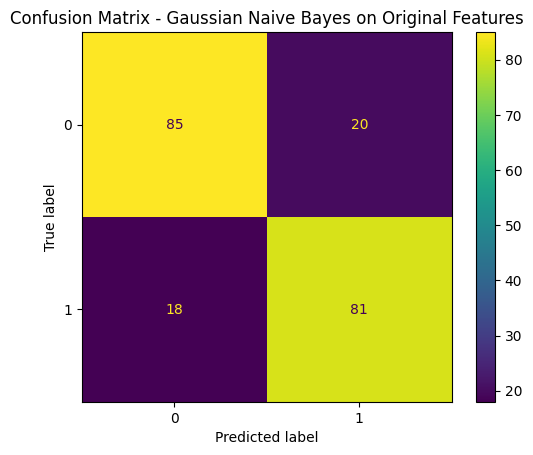


Gaussian Naive Bayes on PCA-Transformed Features:
Best Parameters: {'var_smoothing': 1e-09}
Accuracy: 0.7941176470588235
Precision: 0.7663551401869159
Recall: 0.8282828282828283
F1 Score: 0.7961165048543689

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       105
           1       0.77      0.83      0.80        99

    accuracy                           0.79       204
   macro avg       0.80      0.80      0.79       204
weighted avg       0.80      0.79      0.79       204



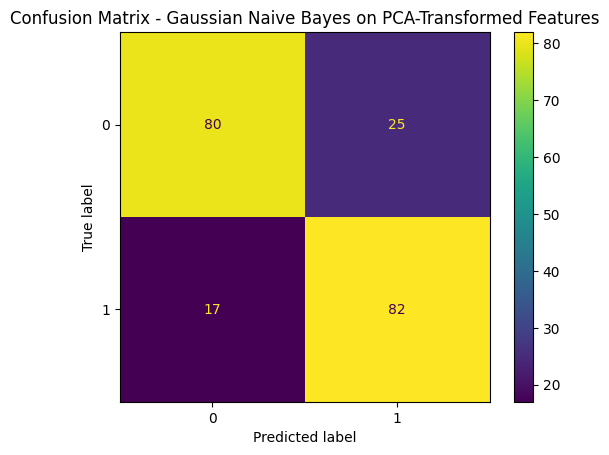

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test, X_train_combined, X_test_combined are already defined

# 1. Define parameter grid for Gaussian Naive Bayes
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter for variance
}

# 2. Hyperparameter tuning for Gaussian Naive Bayes on original features
grid_search_gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5, scoring='accuracy')
grid_search_gnb.fit(X_train, y_train)
best_gnb_original = grid_search_gnb.best_estimator_

# Gaussian Naive Bayes on original features with best parameters
y_pred_gnb_original = best_gnb_original.predict(X_test)
print("\nGaussian Naive Bayes on Original Features:")
print("Best Parameters:", grid_search_gnb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_gnb_original))
print("Precision:", precision_score(y_test, y_pred_gnb_original))
print("Recall:", recall_score(y_test, y_pred_gnb_original))
print("F1 Score:", f1_score(y_test, y_pred_gnb_original))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb_original))


# Confusion Matrix
cm_gnb_original = confusion_matrix(y_test, y_pred_gnb_original)
ConfusionMatrixDisplay(cm_gnb_original).plot()
plt.title("Confusion Matrix - Gaussian Naive Bayes on Original Features")
plt.show()

# 3. Hyperparameter tuning for Gaussian Naive Bayes on PCA-transformed features
grid_search_gnb_pca = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5, scoring='accuracy')
grid_search_gnb_pca.fit(X_train_combined, y_train)
best_gnb_pca = grid_search_gnb_pca.best_estimator_

# Gaussian Naive Bayes on PCA-transformed features with best parameters
y_pred_gnb_pca = best_gnb_pca.predict(X_test_combined)
print("\nGaussian Naive Bayes on PCA-Transformed Features:")
print("Best Parameters:", grid_search_gnb_pca.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_gnb_pca))
print("Precision:", precision_score(y_test, y_pred_gnb_pca))
print("Recall:", recall_score(y_test, y_pred_gnb_pca))
print("F1 Score:", f1_score(y_test, y_pred_gnb_pca))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb_pca))

# Confusion Matrix
cm_gnb_pca = confusion_matrix(y_test, y_pred_gnb_pca)
ConfusionMatrixDisplay(cm_gnb_pca).plot()
plt.title("Confusion Matrix - Gaussian Naive Bayes on PCA-Transformed Features")
plt.show()

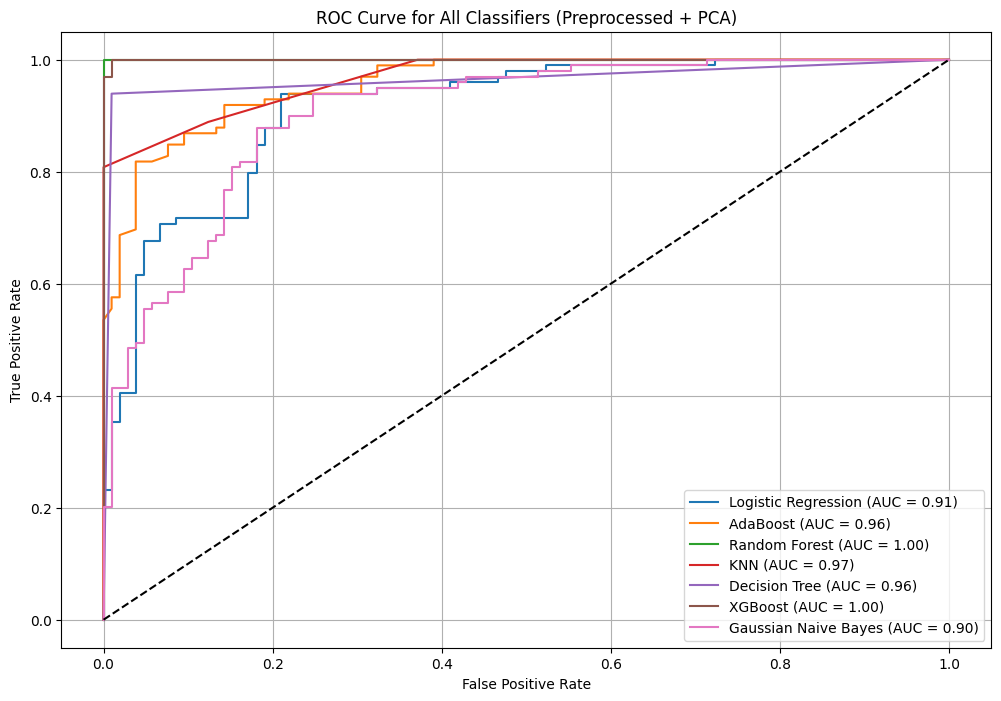

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  # Assuming you've imported this
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


# Assuming X_train_pca, y_train, X_test_pca, y_test are already defined

# 1. Define the models dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    #'SVC': SVC(probability=True),  # Note: probability=True for predict_proba
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    #'MLP': MLPClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

# 2. Plot ROC curves
plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train_pca, y_train)

    # Check if the model has predict_proba, if not, skip it
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_pca)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    else:
        print(f"Skipping ROC curve for {name} as it doesn't have predict_proba.")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve for All Classifiers (Preprocessed + PCA)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=25de51823caa57f42a2be4e356e5119728c78884068bc721815b1a07739b42d9
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import shap
import lime
import lime.lime_tabular

SHAP ON PCA MODEL


In [ ]:
rf_best = grid_search_rf_pca.best_estimator_
rf_best.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Get the PCA component matrix (loadings)
# Each row = principal component, each column = original feature
pca_components = pca.components_

# Get the names of the original features (after scaling and encoding, if any)
feature_names = X_train.columns.tolist()  # or use your encoded + scaled names if needed

# Display top contributors for each component
import pandas as pd
loading_df = pd.DataFrame(pca_components, columns=feature_names, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Show top 5 features for each principal component
for i in range(pca.n_components_):
    print(f'\nTop features contributing to PC{i+1}:')
    print(loading_df.iloc[i].abs().sort_values(ascending=False).head(5))



Top features contributing to PC1:
thalach    0.425866
oldpeak    0.414300
exang      0.386066
slope      0.367369
cp         0.285494
Name: PC1, dtype: float64

Top features contributing to PC2:
trestbps    0.506651
age         0.441748
sex         0.342437
chol        0.285351
cp          0.274104
Name: PC2, dtype: float64

Top features contributing to PC3:
chol       0.525019
slope      0.480482
cp         0.357279
oldpeak    0.322860
thal       0.306509
Name: PC3, dtype: float64

Top features contributing to PC4:
sex        0.619326
fbs        0.452615
ca         0.353899
thalach    0.229446
thal       0.212458
Name: PC4, dtype: float64

Top features contributing to PC5:
restecg    0.563607
thal       0.373944
fbs        0.346730
ca         0.315235
age        0.306846
Name: PC5, dtype: float64

Top features contributing to PC6:
fbs         0.438338
ca          0.384073
thal        0.383250
restecg     0.341518
trestbps    0.289480
Name: PC6, dtype: float64

Top features contributi

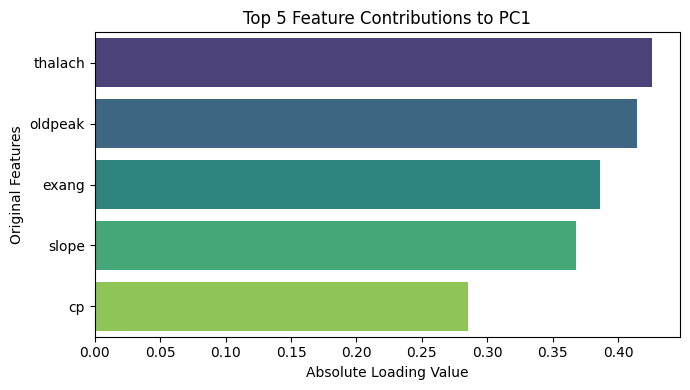

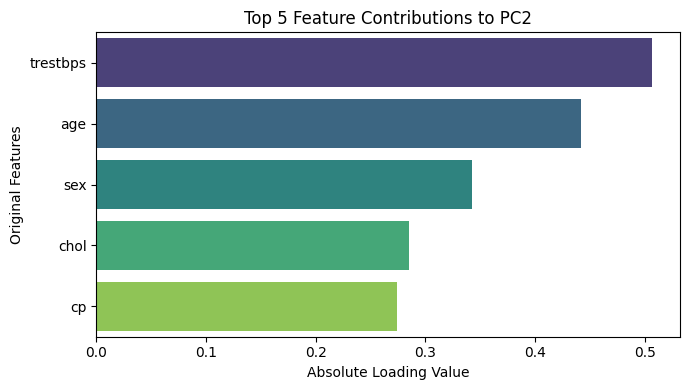

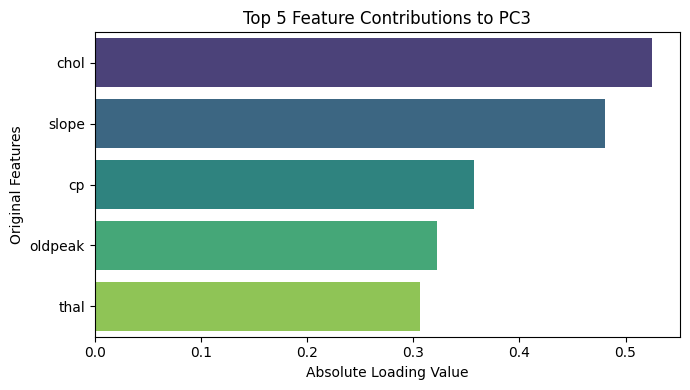

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize top contributing features to each of the top 3 PCs
top_n = 5  # top 5 features
for i in range(3):  # PC1 to PC3
    pc = loading_df.iloc[i].abs().sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(7, 4))
    sns.barplot(x=pc.values, y=pc.index, palette='viridis')
    plt.title(f'Top {top_n} Feature Contributions to PC{i+1}')
    plt.xlabel('Absolute Loading Value')
    plt.ylabel('Original Features')
    plt.tight_layout()
    plt.show()


<Figure size 640x480 with 0 Axes>

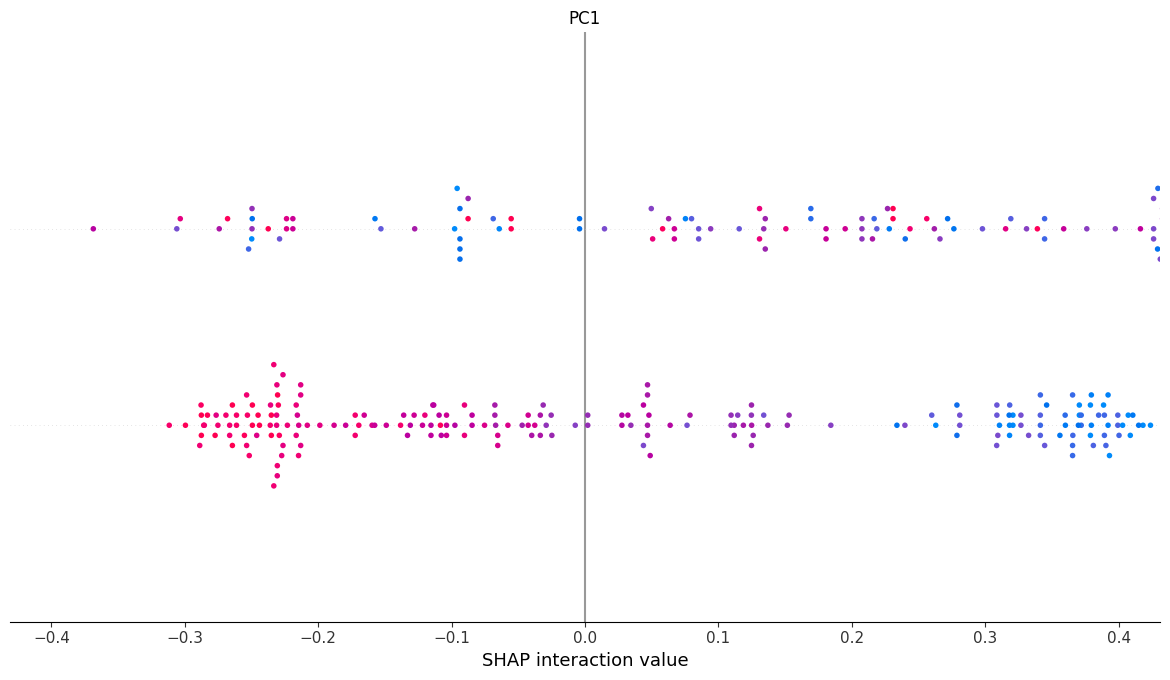

In [ ]:
#SHAP
# Initialize the explainer
explainer = shap.Explainer(rf_best, X_train_pca)

# Compute SHAP values
shap_values = explainer(X_test_pca)

# Summary plot
shap.summary_plot(shap_values, X_test_pca, feature_names=[f"PC{i+1}" for i in range(X_test_pca.shape[1])])


LIME ON PCA MODEL


In [ ]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_pca,
    feature_names=[f"PC{i+1}" for i in range(X_train_pca.shape[1])],
    class_names=['No Disease', 'Disease'],
    mode='classification'
)

# Pick a sample
i = 0  # index of test sample to explain
exp = lime_explainer.explain_instance(
    data_row=X_test_pca[i],
    predict_fn=rf_best.predict_proba
)

# Show explanation
exp.show_in_notebook()


In [ ]:
from lime import lime_tabular

# LIME for PCA-transformed input (16 components)
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_pca,
    feature_names=[f'PC{i+1}' for i in range(X_train_pca.shape[1])],  # PC1 to PC16
    class_names=['No Disease', 'Disease'],
    mode='classification',
    random_state=42
)

# Pick a test instance from X_test_pca
i = 5
instance = X_test_pca[i]

# Explain
exp = explainer.explain_instance(instance, rf_best.predict_proba)
exp.show_in_notebook(show_table=True, show_all=False)


LIME EXPLANATION USING ORIGINAL FEATURE


In [ ]:
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_features = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'fbs','sex','thalach','exang','oldpeak','slope','ca','thal']
X = df[selected_features]
y = df['target']  # Target column

# Initialize LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=selected_features,
    class_names=["0", "1"],
    mode="classification"
)

# Feature importance aggregation
feature_importance = {feature: 0 for feature in selected_features}

# Iterate through a subset of test samples for explanation
num_samples = 100  # Number of test samples to use
for i in range(min(num_samples, len(X_test))):  # Ensure we don't exceed the number of samples
    print(f"Processing sample {i+1}/{num_samples}")
    instance = X_test.iloc[i].values
    explanation = explainer.explain_instance(instance, rf_best.predict_proba)

    # Aggregate feature importance from LIME explanations
    for feature, importance in explanation.as_list():
        # Match the feature name from the explanation to your selected_features
        for selected_feature in selected_features:
            if selected_feature in feature:  # Adjust for partial matches
                feature_importance[selected_feature] += abs(importance)
                break

# Check if feature_importance contains non-zero values
total_importance = sum(feature_importance.values())
if total_importance == 0:
    print("No feature importance values were accumulated. Check the feature names in the explanation output.")
else:
    # Normalize feature importance
    normalized_importance = {k: v / total_importance for k, v in feature_importance.items()}

    # Display ranked features
    sorted_features = sorted(normalized_importance.items(), key=lambda x: x[1], reverse=True)
    print("Feature Importance (LIME-based):")
    for feature, importance in sorted_features:
        print(f"{feature}: {importance:.4f}")

Processing sample 1/100
Processing sample 2/100
Processing sample 3/100
Processing sample 4/100
Processing sample 5/100
Processing sample 6/100
Processing sample 7/100
Processing sample 8/100
Processing sample 9/100
Processing sample 10/100
Processing sample 11/100
Processing sample 12/100
Processing sample 13/100
Processing sample 14/100
Processing sample 15/100
Processing sample 16/100
Processing sample 17/100
Processing sample 18/100
Processing sample 19/100
Processing sample 20/100
Processing sample 21/100
Processing sample 22/100
Processing sample 23/100
Processing sample 24/100
Processing sample 25/100
Processing sample 26/100
Processing sample 27/100
Processing sample 28/100
Processing sample 29/100
Processing sample 30/100
Processing sample 31/100
Processing sample 32/100
Processing sample 33/100
Processing sample 34/100
Processing sample 35/100
Processing sample 36/100
Processing sample 37/100
Processing sample 38/100
Processing sample 39/100
Processing sample 40/100
Processin

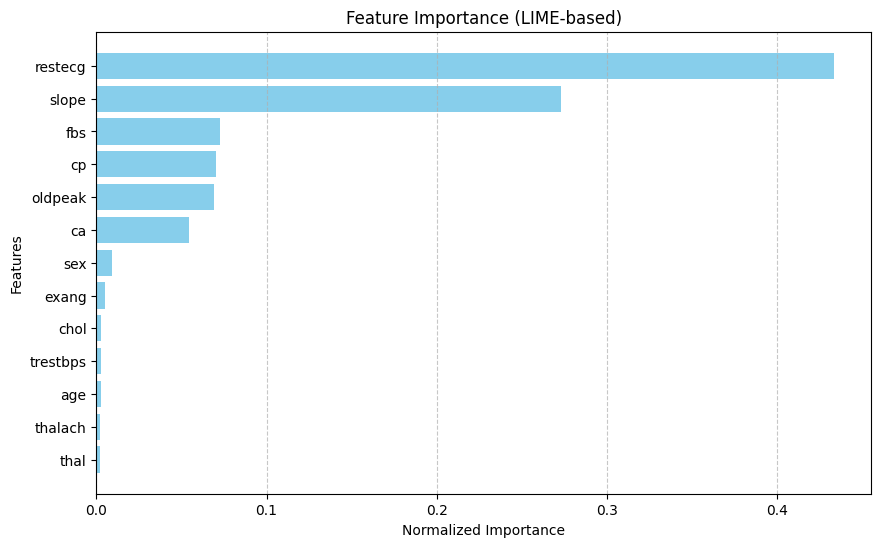

In [ ]:
import matplotlib.pyplot as plt

# Visualize feature importance
if total_importance == 0:
    print("No feature importance values were accumulated. Skipping visualization.")
else:
    # Sort features by importance
    sorted_features = sorted(normalized_importance.items(), key=lambda x: x[1], reverse=True)
    features, importances = zip(*sorted_features)

    # Create a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances, color='skyblue')
    plt.xlabel("Normalized Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance (LIME-based)")
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

SHAP EXPLANATION USING ORIGINAL FEATURE


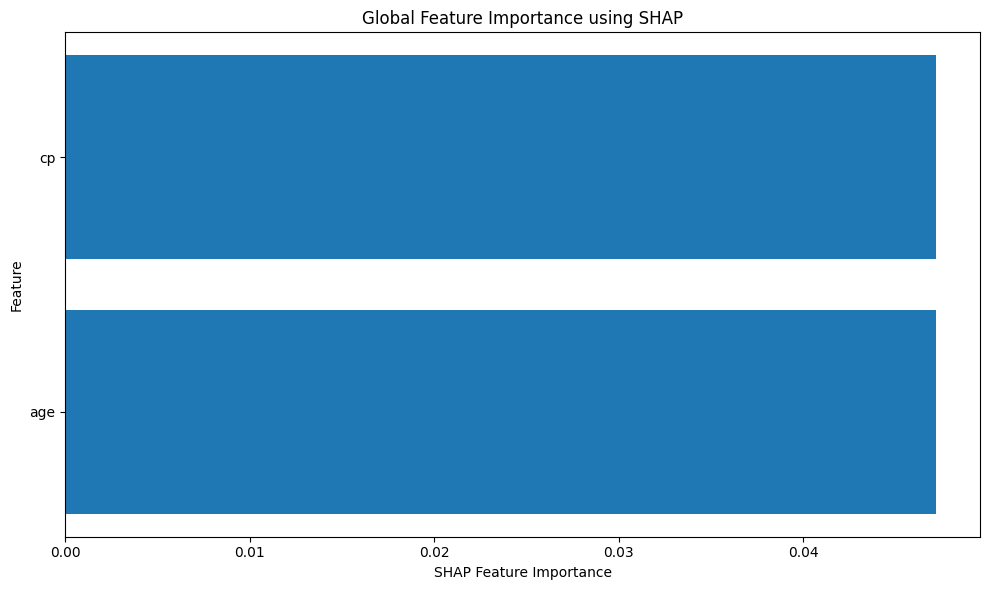

In [ ]:
import shap
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_best)

# Calculate SHAP values for a subset of test samples
num_samples = 100  # You can adjust this number
shap_values = explainer.shap_values(X_test[:num_samples])

# Global feature importance based on mean absolute SHAP values
global_feature_importance = np.abs(shap_values[1]).mean(axis=0)  # Use shap_values[1] for class 1

# Create a list of feature names and their importance scores
feature_importance_list = list(zip(selected_features, global_feature_importance))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# Display or further process the global feature importance scores
import matplotlib.pyplot as plt

# Extract feature names and importance values
feature_names = [feature[0] for feature in sorted_feature_importance]
importance_values = [feature[1] for feature in sorted_feature_importance]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_values)
plt.xlabel("SHAP Feature Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance using SHAP")
plt.tight_layout()
plt.show()

In [ ]:
feature_ranges = {
    'age': (20, 80),
    'sex': (0, 1),
    'cp': (0, 3),
    'trestbps': (90, 200),
    'chol': (100, 300),
    'fbs': (0, 1),
    'restecg': (0, 2),
    'thalach': (70, 220),
    'exang': (0, 1),
    'oldpeak': (0, 6.2),
    'slope': (0, 2),
    'ca': (0, 4),
    'thal': (0, 3)
}

In [ ]:
#Function to check if a record's features fall within the specified ranges
def check_features_within_ranges(record):
    for feature, feature_range in feature_ranges.items():
        if not (feature_range[0] <= record[feature] <= feature_range[1]):
            return False
    return True

In [ ]:
# Filter records that fall within the specified feature ranges
filtered_records = [record for _, record in df.iterrows() if check_features_within_ranges(record)]
filtered_records_df = pd.DataFrame(filtered_records)

# Store the patient numbers in a list
patients_for_cvd_testing = filtered_records_df.index.tolist()


In [ ]:
# Function to check if a patient's attributes fall within heart disease screening ranges
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

def check_for_cvd(patient):
    return all(feature_ranges[feature][0] <= patient[feature] <= feature_ranges[feature][1] for feature in features)

# Function to predict heart disease for a dataset
def predict_cvd_for_dataset(filtered_records_df):
    return [check_for_cvd(row) for _, row in filtered_records_df.iterrows()]

# Function to get user inputs for patient attributes
def get_user_inputs():
    patient = {}
    for feature in features:
        while True:
            value = input(f"Enter value for {feature}: ")
            try:
                patient[feature] = float(value)
                break
            except ValueError:
                print(f"Invalid input for {feature}. Please enter a numeric value.")
    return patient

# Function to predict heart disease for user inputs
def predict_cvd_for_user_inputs():
    user_patient = get_user_inputs()
    prediction = check_for_cvd(user_patient)
    if prediction:
        print("Based on the provided data, the patient may be at risk of heart disease. Please consult a doctor.")
    else:
        print("Based on the provided data, the patient is not likely at risk of heart disease.")

# Main function
def main():
    # Predict heart disease for filtered records
    cvd_predictions = predict_cvd_for_dataset(filtered_records_df)
    filtered_records_df['CVD Prediction'] = cvd_predictions

    # Predict heart disease for user inputs
    print("\nPredict heart disease for new patient:")
    predict_cvd_for_user_inputs()

if __name__ == "__main__":
    main()


Predict heart disease for new patient:
Enter value for age: 53
Enter value for sex: 1
Enter value for cp: 1
Enter value for trestbps: 140
Enter value for chol: 203
Enter value for fbs: 1
Enter value for restecg: 0
Enter value for thalach: 154
Enter value for exang: 1
Enter value for oldpeak: 3.1
Enter value for slope: 0
Enter value for ca: 0
Enter value for thal: 3
Based on the provided data, the patient may be at risk of heart disease. Please consult a doctor.


In [ ]:
# Function to check if a patient's attributes fall within heart disease screening ranges
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

def check_for_cvd(patient):
    return all(feature_ranges[feature][0] <= patient[feature] <= feature_ranges[feature][1] for feature in features)

# Function to predict heart disease for a dataset
def predict_cvd_for_dataset(filtered_records_df):
    return [check_for_cvd(row) for _, row in filtered_records_df.iterrows()]

# Function to get user inputs for patient attributes
def get_user_inputs():
    patient = {}
    for feature in features:
        while True:
            value = input(f"Enter value for {feature}: ")
            try:
                patient[feature] = float(value)
                break
            except ValueError:
                print(f"Invalid input for {feature}. Please enter a numeric value.")
    return patient

# Function to predict heart disease for user inputs
def predict_cvd_for_user_inputs():
    user_patient = get_user_inputs()
    prediction = check_for_cvd(user_patient)
    if prediction:
        print("Based on the provided data, the patient may be at risk of heart disease. Please consult a doctor.")
    else:
        print("Based on the provided data, the patient is not likely at risk of heart disease.")

# Main function
def main():
    # Predict heart disease for filtered records
    cvd_predictions = predict_cvd_for_dataset(filtered_records_df)
    filtered_records_df['CVD Prediction'] = cvd_predictions

    # Predict heart disease for user inputs
    print("\nPredict heart disease for new patient:")
    predict_cvd_for_user_inputs()

if __name__ == "__main__":
    main()


Predict heart disease for new patient:
Enter value for age: 30
Enter value for sex: 1
Enter value for cp: 0
Enter value for trestbps: 100
Enter value for chol: 80
Enter value for fbs: 0
Enter value for restecg: 1
Enter value for thalach: 80
Enter value for exang: 1
Enter value for oldpeak: 2
Enter value for slope: 1
Enter value for ca: 2
Enter value for thal: 1
Based on the provided data, the patient is not likely at risk of heart disease.


In [ ]:
!pip install streamlit pyngrok joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
import joblib

# Assuming 'best_rf_original' is your desired model
# Replace 'best_rf_original' with the model you want to save (best_rf_pca, best_ada_original, etc.)
model_to_save = best_rf_original

joblib.dump(model_to_save, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

model = joblib.load('heart_disease_model.pkl')

st.title(" Cardiovascular Disease Prediction App")
st.write("Fill the form to check your heart health status:")

age = st.number_input("Age", min_value=1, max_value=120, value=30)
sex = st.selectbox("Sex", options=[0, 1])
cp = st.selectbox("Chest Pain Type", options=[0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure", value=120)
chol = st.number_input("Cholesterol (mg/dl)", value=200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", options=[0, 1])
restecg = st.selectbox("Resting ECG Result", options=[0, 1, 2])
thalach = st.number_input("Max Heart Rate Achieved", value=150)
exang = st.selectbox("Exercise Induced Angina", options=[0, 1])
oldpeak = st.number_input("Oldpeak", value=1.0)
slope = st.selectbox("Slope of ST Segment", options=[0, 1, 2])
ca = st.selectbox("Number of Major Vessels (0-4)", options=[0, 1, 2, 3, 4])
thal = st.selectbox("Thalassemia (1=Normal, 2=Fixed, 3=Reversible)", options=[1, 2, 3])

if st.button("Predict"):
    user_input = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                            thalach, exang, oldpeak, slope, ca, thal]])
    prediction = model.predict(user_input)[0]

    if prediction == 1:
        st.error(" Risk of cardiovascular disease detected.")
    else:
        st.success(" No risk detected. Keep taking care!")


Writing app.py


In [ ]:
import subprocess
subprocess.Popen(["streamlit", "run", "app.py"])


<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>

In [ ]:
from pyngrok import ngrok

   # Authenticate ngrok with your auth token
ngrok.set_auth_token("2vqEuuYHvpFrw4Pc2RQU8xaIOsr_3n6uQFapNVTohvxFCmM3K")

public_url = ngrok.connect(8501)

   # Output the public URL
print(f"Public URL: {public_url}")

Public URL: NgrokTunnel: "https://713e-35-221-218-114.ngrok-free.app" -> "http://localhost:8501"
